# Social Network Analysis
    By Oghosa Igbinakenzua
    MIE 451 | Decision Support Systems
    December 3, 2017
    
This project involves social network analysis based on twitter data. It provides a better understanding of graph analysis methods, as well as different centrality measures in the graph.

In [1]:
import networkx as nx

# Loading Twitter Data

In [2]:
import pandas as pd

In [3]:
!pwd

/c/Users/oghosa/sna-assignment-oghosa


Download the tweets CSV from https://goo.gl/NbpSek
Put "tweets2009-06-0115.csv.zip" in the current folder (based on "!pwd" above)

In [4]:
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')

In [5]:
print("Num of rows:", df.shape[0])

Num of rows: 3437690


In [6]:
df.head()

date        user          tweet
0  2009-06-01 21:43:59  burtonator  No Post Title
1  2009-06-01 21:47:23  burtonator  No Post Title
2  2009-06-02 01:15:44  burtonator  No Post Title
3  2009-06-02 05:17:52  burtonator  No Post Title
4  2009-06-02 23:58:25  burtonator  No Post Title

## Finding most common hash tags

In [7]:
from collections import Counter

In [8]:
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

## Q1. Chose a hashtag = #news

In [9]:
hashtag = '#news'
newsTag = df[df["tweet"].str.lower().str.contains(hashtag, na=False)].copy()

In [10]:
newsTag.head()

date             user  \
365   2009-06-11 16:56:56    weightlossyes   
1726  2009-06-11 16:59:44    thekauderergp   
4035  2009-06-11 17:05:30           fellen   
5028  2009-06-11 17:07:07  athleticsafrica   
7339  2009-06-11 17:09:53     videobuzzers   

                                                  tweet  
365   Might Weight-Loss Surgery Lead to Fractures? -...  
1726  #NEWS FEED: Meditations in Awesomeness: An Ear...  
4035  RT INSANITY! @HeyTammyBruce The EPA seriously ...  
5028  Just added myself to the http://wefollow.com t...  
7339  Miley, Fergie, Lindsay, Amy, and Jenny gossip ...

In [11]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [12]:
addMentionedColumn(newsTag)

In [13]:
newsTag.head()

date             user  \
365   2009-06-11 16:56:56    weightlossyes   
1726  2009-06-11 16:59:44    thekauderergp   
4035  2009-06-11 17:05:30           fellen   
5028  2009-06-11 17:07:07  athleticsafrica   
7339  2009-06-11 17:09:53     videobuzzers   

                                                  tweet        mentioned  
365   Might Weight-Loss Surgery Lead to Fractures? -...               []  
1726  #NEWS FEED: Meditations in Awesomeness: An Ear...               []  
4035  RT INSANITY! @HeyTammyBruce The EPA seriously ...  [heytammybruce]  
5028  Just added myself to the http://wefollow.com t...               []  
7339  Miley, Fergie, Lindsay, Amy, and Jenny gossip ...               []

## Q2. Build a Mention Graph

In [14]:
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, {'numberMentions': 1})
    
    return g

In [15]:
newsGraph = mentionGraph(newsTag)

## Q2.a -- How many nodes and how many edges in your mention graph? 

In [16]:
print("# nodes:", len(newsGraph.nodes()))
print("# edges:", len(newsGraph.edges()))

# nodes: 896
# edges: 853


In [17]:
'''#Check tags
hashtag = '#news'
testTag = df[df["tweet"].str.lower().str.contains(hashtag, na=False)].copy()
addMentionedColumn(testTag)
testGraph = mentionGraph(testTag)
print("# nodes:", len(testGraph.nodes()))
print("# edges:", len(testGraph.edges()))
'''

'#Check tags\nhashtag = \'#news\'\ntestTag = df[df["tweet"].str.lower().str.contains(hashtag, na=False)].copy()\naddMentionedColumn(testTag)\ntestGraph = mentionGraph(testTag)\nprint("# nodes:", len(testGraph.nodes()))\nprint("# edges:", len(testGraph.edges()))\n'

In [18]:
#

## Q2.b -- Build a histogram of the graph nodes’ degree (i.e., the degree distribution of the graph). What can you learn from the degree distribution?

In [19]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

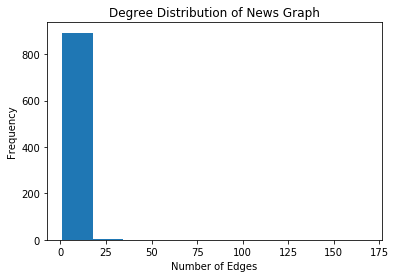

In [20]:
plt.hist(newsGraph.degree().values())
plt.title("Degree Distribution of News Graph")
plt.xlabel("Number of Edges")
plt.ylabel("Frequency")
fig = plt.gcf()

In [152]:
newsGraph['westpan']

{'codeezra)': {'numberMentions': 1},
 'davenp35)': {'numberMentions': 1},
 'rightone': {'numberMentions': 1}}

In [167]:
nodeEdgesCount = []
for node in newsGraph.nodes():
    nodeEdgesCount.append((node, len(newsGraph[node])))
    
nodeEdgesCountDF = pd.DataFrame(nodeEdgesCount)
nodeEdgesCountDF.columns = ['user', 'number Of Edges']
nodeEdgesCountDF = nodeEdgesCountDF.sort_values(by='number Of Edges', ascending=False)
nodeEdgesCountDF

user  number Of Edges
822            katyinindy              168
237              dcjoel85               55
356         nuttynewswire               26
500        doloresmbernal               24
273            ryancarson               16
846           resemblance               12
57            mikeinto101               11
487               kackerl               10
817             f1updates               10
358          librarygrape               10
389       biscuit4lobster                8
881                charga                8
123         reallybuffalo                8
122        manutd_updates                8
359             amprather                7
520                 aahaa                7
574            mmaine2008                7
584                 stcom                7
739          yildirimnews                7
548           indienation                7
349            freedomist                6
77     change_for_iran"my                6
328           spinelli666                6
0                                        6
830              krigeren                6
873           katyinindy)                6
104                   hj2                5
889            chasemommy                5
320              noetical                5
814               norm739                5
..                    ...              ...
475            dawgfantc)                1
141                usfora                1
139                mr_gr8                1
477  f1updates(autosport)                1
478               danwhnt                1
138              theneave                1
480           mozartrules                1
481                  nshn                1
482                   phs                1
466                jwatts                1
464            danspowers                1
149           pitcherpark                1
454                n24_de                1
447             caitriona                1
1             riverleaves                1
449       doubledown_insl                1
450       taxspendliberal                1
451          mikeinto101)                1
147                _7654_                1
453               rocktek                1
146       secsportsupdate                1
142           squarespace                1
456                 kpcom                1
145                qaywee                1
458              cmreport                1
144                daichi                1
460               nprnews                1
143               marleed                1
462          rightwinger2                1
448                redtux                1

[896 rows x 2 columns]

## Q2.c  -- Provide a list of top 5 edges with highest weights (edges are identified be the two nodes they connects, e.g., (node1, node2).

In [22]:
edgesSortedByWeight = sorted(newsGraph.edges(data=True), key=lambda x: x[2]['numberMentions'], reverse=True)
edgesSortedByWeight[:5]

[('brokdikdog', 'katyinindy', {'numberMentions': 32}),
 ('mikeinto101', 'mmaine2008', {'numberMentions': 12}),
 ('mercypolitics', 'doloresmbernal', {'numberMentions': 10}),
 ('katyinindy', 'chasemommy', {'numberMentions': 10}),
 ('pepper_10', 'katyinindy', {'numberMentions': 9})]

## Q2.d  -- Provide a visualization of the mention graph in which the edge color reflects its weight (i.e., the number of mentions).

In [23]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [24]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph,"pos", posDict)

In [25]:
addRandomPositions(newsGraph)

In [26]:
import colorlover as cl
from IPython.display import HTML

In [136]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['OrRd']
purd300 = cl.interp(purd, 300)
#HTML(cl.to_html(purd300))

In [140]:
def plotNetworkEdgeWeightColor(graph):
    closenessCentr = nx.closeness_centrality(newsGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    edgesWeightList = list(map(lambda x: x[2]['numberMentions'], edgesSortedByWeight))
    maxEdgeWeight = max(edgesWeightList)
    minEdgeWeight = min(edgesWeightList)
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth-minEdgeWeight)/(maxEdgeWeight-minEdgeWeight))
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                text="Weight: %d [%s , %s]" % (edgeWidth, node1, node2),
                hoverinfo='text',
                mode='lines', 
                line=Line(color=purd300[edgeColor]))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        #nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos],
                marker=dict(
                    color="#888"))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [141]:
#plotNetworkEdgeWeightColor(newsGraph)
newsGraphCircular = newsGraph.copy()
applyLayout(newsGraphCircular, nx.circular_layout)
plotNetworkEdgeWeightColor(newsGraphCircular)

## Q3. Content Analysis

### Q3.a -- Analyze the most common words in all the tweets with the chosen hash-tag, and provide a basic description of the main themes.

In [32]:
from nltk.corpus import stopwords

In [41]:
allTweets = newsTag["tweet"].str.cat(sep=' ')
stop = set(stopwords.words('english'))
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split() if word.lower() not in stop and len(word) > 2]
tweetWordsCounter = Counter(tweetWords)

In [43]:
print('Most Freqent words int all #news tweets')
mostFreq = pd.DataFrame(tweetWordsCounter.most_common(15))
mostFreq.columns=['word', 'frequency']
mostFreq

Most Freqent words int all #news tweets


word  frequency
0         #news       2837
1         #tcot        669
2          #gop        404
3         #hhrs        392
4        #obama        302
5   @katyinindy        296
6         obama        280
7           #p2        162
8         #tlot        159
9           new        153
10         news        144
11        #digg        142
12      twitter        126
13   #obamacare        114
14          #f1         98

### [ANSWER] Q3.a -- Analyze the most common words in all the tweets with the chosen hash-tag, and provide a basic description of the main themes.
The main themes around the #news hashtag had to do with politics. This is visible from words and other hashtags such as #gop, obama, #obama and #obamacare

### Q3.b --  In the visualization of the mention graph, add hover information for the nodes, describing the 3 most common words for this user. Add any other hover information that may help you understand the social network better.

In [101]:
#for node in newsGraph.nodes():
    #print(node)
import operator

for node in newsGraph.nodes():
    userTweets = pd.DataFrame(newsTag.loc[operator.eq(newsTag['user'],node)]['tweet'])
    #newsTag.loc[operator.eq(newsTag['user'],'brokdikdog')]['tweet'].tolist()
    allUserTweets = userTweets["tweet"].str.cat(sep=' ')
    stop = set(stopwords.words('english'))
    tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allUserTweets.split() if word.lower() not in stop and len(word) > 2]
    tweetWordsCounter = Counter(tweetWords)
    sortedUserTweets = tweetWordsCounter.most_common()
    #print (sortedUserTweets[0])
    print (node + "--")
    if(len(sortedUserTweets)>0): print (sortedUserTweets[0])

--
riverleaves--
('congressional', 2)
katyinldy--
dirk2112--
('dear', 1)
wetoldyouso--
('hate', 1)
one_news_page--
('#news', 41)
sonyams--
('green', 1)
robgodfrey--
('bill', 1)
nxnefest--
musformation--
futbolmexico--
('spree', 1)
fellen--
('seriously', 1)
jackimo--
('@nuttynewswire', 2)
jdaze--
('israel', 2)
lynpurpura--
('join', 2)
palestine--
huntingnfishing--
paulvalach--
('defeated', 1)
rottenappledd--
gita--
ryking--
whoareyoudoing--
('@hanginwithstang', 2)
hrconnector--
kamper--
('green', 1)
buzzflash--
steve_schippert--
derreisefuehrer--
('#sailing', 2)
leicesterrugby)--
kennethlaw--
('#news', 3)
filmclassics--
('public', 1)
thekauderergp--
('#news', 31)
tomloverro--
('watch', 2)
sie_ftm--
cynthia2054--
('', 1)
dmf71rt--
lirazfilanx--
('viva', 1)
rebeccaevan--
('#news', 2)
dinuks--
('http://tinychat.com', 1)
msnmoneystories--
('#digg', 3)
disinfo--
jilevin--
('#topprog', 13)
mercypolitics--
('#newsjunkie', 8)
mrmannycan--
('@katyinindy', 2)
tinwoodsman--
('@katyinindy', 2)
seni

3185233    RT @celebright RT @hanginwithstang #FarrahFawc...
3246589    RT @hanginwithstang #Rhianna to pose for #Play...
Name: tweet, dtype: object

In [116]:
import operator

def plotNetworkEdgeWeightColorWithMostCommonWords(graph):
    closenessCentr = nx.closeness_centrality(newsGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    edgesWeightList = list(map(lambda x: x[2]['numberMentions'], edgesSortedByWeight))
    maxEdgeWeight = max(edgesWeightList)
    minEdgeWeight = min(edgesWeightList)
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth-minEdgeWeight)/(maxEdgeWeight-minEdgeWeight))
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                #text="Weight: %d [%s , %s]" % (edgeWidth, node1, node2),
                mode='lines', 
                line=Line(width=edgeWidth ,color=purd300[edgeColor]))
        scatters.append(s)



    for node in graph.nodes():
        userTweets = pd.DataFrame(newsTag.loc[operator.eq(newsTag['user'],node)]['tweet'])
        allUserTweets = userTweets["tweet"].str.cat(sep=' ')
        stop = set(stopwords.words('english'))
        tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allUserTweets.split() if word.lower() not in stop and len(word) > 2]
        tweetWordsCounter = Counter(tweetWords)
        sortedUserTweets = tweetWordsCounter.most_common()

        if len(sortedUserTweets) > 3:
            nodetext="USER: %s TOP_WORDS[%s, %s, %s]" % (node, sortedUserTweets[0],sortedUserTweets[1],sortedUserTweets[2]),
        else:
            nodetext="USER: %s TOP_WORDS[--]" % (node),
        
        nodeCentr = closenessCentr[node]
        #nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.node[node]['pos']

        s = Scatter(
                x=[xPos], 
                y=[yPos],
                text = nodetext,
                hoverinfo='text',
                marker=dict(
                    color="#888"))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [133]:
def applyLayout(graph, layoutFunc):
    posDict = layoutFunc(graph) 
    nx.set_node_attributes(graph, "pos", posDict)

In [138]:
#plotNetworkEdgeWeightColorWithMostCommonWords(newsGraph)
newsGraphCircular = newsGraph.copy()
applyLayout(newsGraphCircular, nx.circular_layout)
plotNetworkEdgeWeightColorWithMostCommonWords(newsGraphCircular)

# Q4. Centrlity Analysis

## Q4.a -- Choose two centrality measures and calculate the centrality of the nodes on your graph based on each of the measures.

* Degree Centrality

**Definition**: Degree centrality assigns an importance score based purely on the number of links held by each node.

**What it tells us***: How many direct, ‘one hop’ connections each node has to other nodes within the network.

**When to use it**: For finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network.

**A bit more detail**: Degree centrality is the simplest measure of node connectivity. Sometimes it’s useful to look at in-degree (number of inbound links) and out-degree (number of outbound links) as distinct measures, for example when looking at transactional data or account activity.

* Betweeness: 

**Definition**: Betweenness centrality measures the number of times a node lies on the shortest path between other nodes.

**What it tells us**: This measure shows which nodes act as ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one.

**When to use it**: For finding the individuals who influence the flow around a system.

**A bit more detail**: Betweenness is useful for analyzing communication dynamics, but should be used with care. A high betweenness count could indicate someone holds authority over, or controls collaboration between, disparate clusters in a network; or indicate they are on the periphery of both clusters.

Source:https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/

In [146]:
def plotNetworkSizeColorDegree(graph):
    closenessCentr = nx.degree_centrality(newsGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\n Degree: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='marker', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size= int(100*(nodeCentr-minCentr)/(maxCentr-minCentr)),         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [147]:
#plotNetworkSizeColorBetween(newsGraph)
newsGraphSpring = newsGraph.copy()
applyLayout(newsGraphSpring, nx.spring_layout)
plotNetworkSizeColorDegree(newsGraphSpring)

In [148]:
def plotNetworkSizeColorBetween(graph):
    closenessCentr = nx.betweenness_centrality(newsGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\n Between: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='marker', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size= int(100*(nodeCentr-minCentr)/(maxCentr-minCentr)),         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [149]:
#plotNetworkSizeColorEigen(newsGraph)
newsGraphSpring = newsGraph.copy()
applyLayout(newsGraphSpring, nx.spring_layout)
plotNetworkSizeColorBetween(newsGraphSpring)

## Q4.c -- Identify the key players in the mentioned graph based on the centrality measures.

### 1. [ANSWER] Are the results similar or different? Explain what can be the reason for the observed similarity or difference.

The results are similar for only the top node but differs for the others. The user 'katyinindy' is top by degree centrality and betweeness. This occurs because 'katyinindy' has the most edges at 168 which is over 3 times the next closest user 'dcjoel85' at 55 edges. Both measures also align on the top user becasue it is excpeted that since 'katyinindy' has the most connections, the use would have the shortest past across most of the other users in the graph.

The difference between both measures are visible from the 2 ranked users. for Degree Centrality, 'dcjoel85' is ranked 2nd while for Betweenness, 'mikeinto101' is ranked 2nd. This difference occurs because while the 'dcjoel85' may have the 2nd highest number of edges, 'mikeinto101' lies on the shortest path between other nodes more times than 'dcjoe85'.

### 2. [ANSWER] What centrality measure produced more meaningful interpretation?
Betweeness produced a more meaningful measure beacause it showed the individuals who influence the flow around a graph.

In [171]:
print("Users ranked by edges")
nodeEdgesCountDF

Users ranked by edges


user  number Of Edges
822            katyinindy              168
237              dcjoel85               55
356         nuttynewswire               26
500        doloresmbernal               24
273            ryancarson               16
846           resemblance               12
57            mikeinto101               11
487               kackerl               10
817             f1updates               10
358          librarygrape               10
389       biscuit4lobster                8
881                charga                8
123         reallybuffalo                8
122        manutd_updates                8
359             amprather                7
520                 aahaa                7
574            mmaine2008                7
584                 stcom                7
739          yildirimnews                7
548           indienation                7
349            freedomist                6
77     change_for_iran"my                6
328           spinelli666                6
0                                        6
830              krigeren                6
873           katyinindy)                6
104                   hj2                5
889            chasemommy                5
320              noetical                5
814               norm739                5
..                    ...              ...
475            dawgfantc)                1
141                usfora                1
139                mr_gr8                1
477  f1updates(autosport)                1
478               danwhnt                1
138              theneave                1
480           mozartrules                1
481                  nshn                1
482                   phs                1
466                jwatts                1
464            danspowers                1
149           pitcherpark                1
454                n24_de                1
447             caitriona                1
1             riverleaves                1
449       doubledown_insl                1
450       taxspendliberal                1
451          mikeinto101)                1
147                _7654_                1
453               rocktek                1
146       secsportsupdate                1
142           squarespace                1
456                 kpcom                1
145                qaywee                1
458              cmreport                1
144                daichi                1
460               nprnews                1
143               marleed                1
462          rightwinger2                1
448                redtux                1

[896 rows x 2 columns]